In [1]:
!wget https://github.com/WongKinYiu/yolov7
!/content/yolov7/yolov7.pt
!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt
!python detect.py --weights yolov7.pt --source 0


--2024-06-10 07:26:46--  https://github.com/WongKinYiu/yolov7
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘yolov7’

yolov7                  [ <=>                ] 397.25K  --.-KB/s    in 0.1s    

2024-06-10 07:26:47 (3.12 MB/s) - ‘yolov7’ saved [406781]

/bin/bash: line 1: /content/yolov7/yolov7.pt: Not a directory
--2024-06-10 07:26:47--  https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://objects.githubusercontent.com/github-production-release-asset-2e65be/511187726/b0243edf-9fb0-4337-95e1-42555f1b37cf?X-Amz-Algorithm=AWS4-HMAC-SHA256&X-Amz-Credential=releaseassetproduction%2F20240610%2Fus-east-1%2Fs3%2Faws4_request&X

In [2]:

!wget https://pjreddie.com/media/files/yolov3.weights
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.data


--2024-06-10 07:27:07--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  6.20MB/s    in 52s     

2024-06-10 07:27:59 (4.58 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2024-06-10 07:28:00--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2

In [3]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15851, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 15851 (delta 5), reused 13 (delta 4), pack-reused 15833
Receiving objects: 100% (15851/15851), 14.42 MiB | 18.72 MiB/s, done.
Resolving deltas: 100% (10671/10671), done.


In [4]:

%cd darknet
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1' Makefile


/content/darknet
sed: -e expression #1, char 27: unterminated `s' command


In [5]:
!make


mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:14: warning: unused variable ‘bu

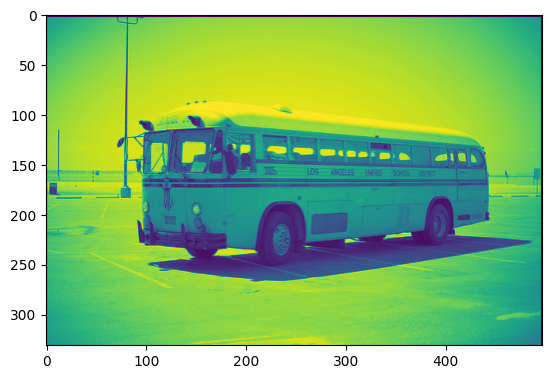

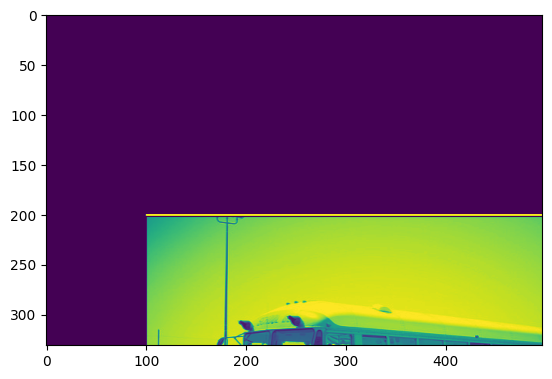

(<matplotlib.image.AxesImage at 0x7c95405e3c70>, None)

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 定義一個平移函數
def translate(image, x, y):
    height, width = image.shape[:2]  # 取得影像長、寬
    M = np.float32([[1, 0, x], [0, 1, y]])  # 定義轉換矩陣 M
    shifted = cv2.warpAffine(image, M, (width, height))  # 實現仿射轉換
    return shifted  # 回傳轉換結果

img = cv2.imread("/content/0000000000472.PNG", 0)  # 讀取影像
new = translate(img, 100, 200)   # 進行平移

# 顯示原始影像、轉換結果
plt.imshow(img),plt.show()
plt.imshow(new),plt.show()

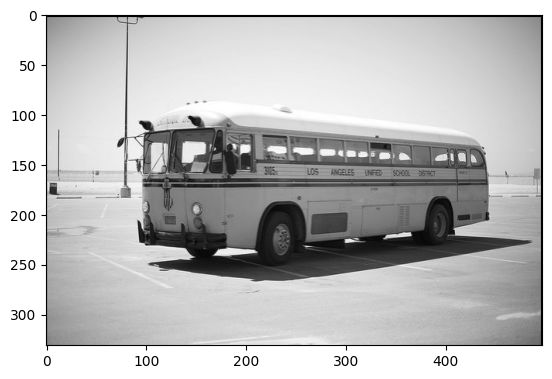

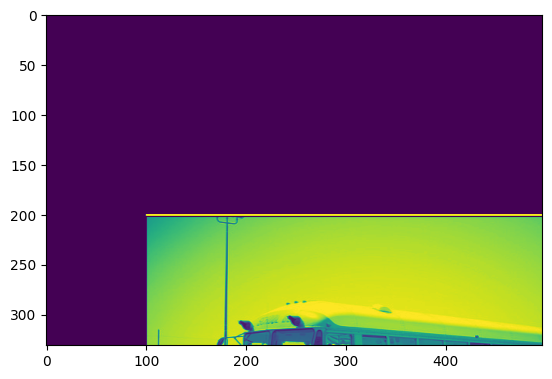

(<matplotlib.image.AxesImage at 0x7c953d80d300>, None)

In [8]:
# YOLO object detection
import cv2 as cv
import numpy as np
import time
img = cv.imread('/content/0000000000472.PNG')




# 顯示原始影像、轉換結果
plt.imshow(img),plt.show()
plt.imshow(new),plt.show()

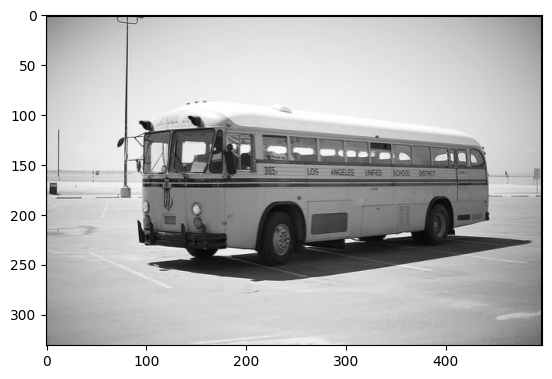

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread('/content/0000000000472.PNG')
plt.imshow(image)


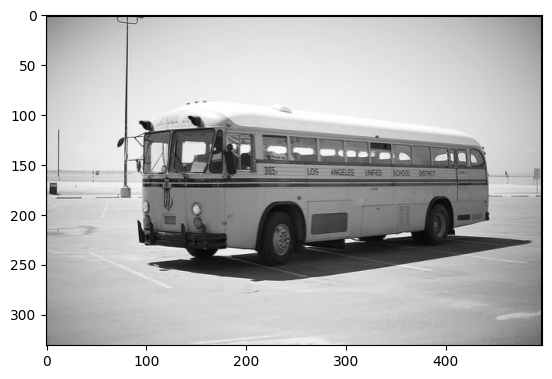

In [10]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread('/content/0000000000472.PNG')
plt.imshow(image)

plt.imshow(image)

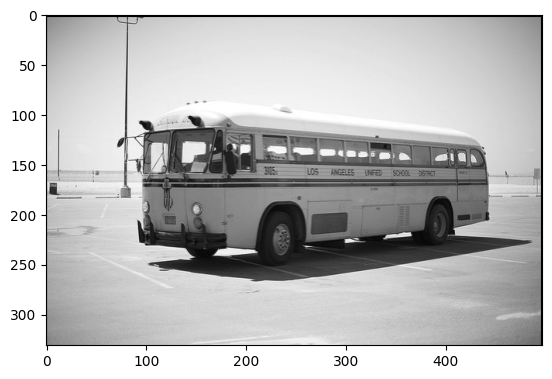

In [11]:
import cv2  #bringing in OpenCV libraries
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) #grayscale conversion

plt.imshow(gray, cmap='gray')
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

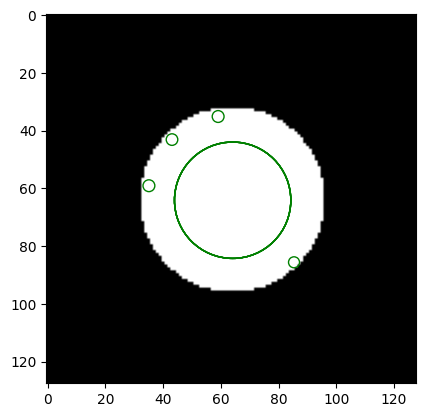

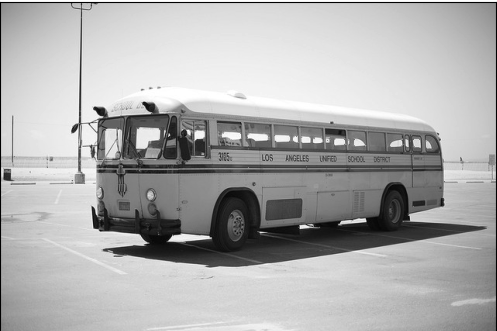

In [12]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

x = np.arange(128)-64

X, Y = np.meshgrid(x,x)

f = (100*(np.hypot(X,Y)<32)).astype(np.uint8)

plt.clf()

plt.imshow(f);

plt.gray()

sift = cv2.xfeatures2d.SIFT_create()

kps, dscs = sift.detectAndCompute(f, mask=None)

ax = plt.gca()

for kp in kps:
   ax.add_artist( plt.Circle((kp.pt), kp.size/2, color='green', fill=False))


plt.show()
cv2_imshow(img)

<ipython-input-13-18cbd106cf2e>:22: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  res = np.int0(res)


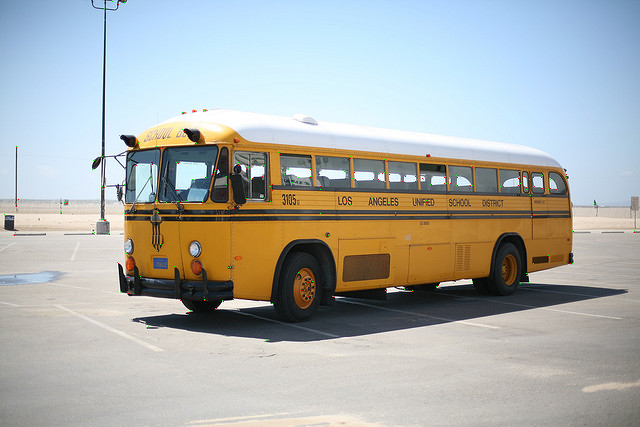

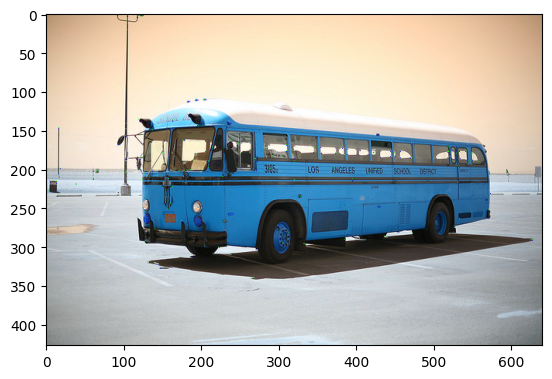

(<matplotlib.image.AxesImage at 0x7c9540522bf0>, None)

In [13]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
filename = '/content/000000000471.jpg'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
# find Harris corners
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
dst = cv.dilate(dst,None)
ret, dst = cv.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)
# find centroids
ret, labels, stats, centroids = cv.connectedComponentsWithStats(dst)
# define the criteria to stop and refine the corners
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]
cv.imwrite('/content/000000000471.jpg',img)#subpixel5.png
plt.show()
cv2_imshow(img)
plt.imshow(img),plt.show()

<ipython-input-14-a4ffc7142707>:22: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  res = np.int0(res)


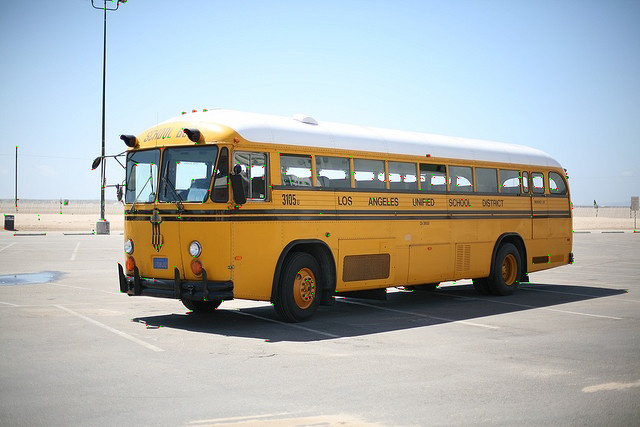

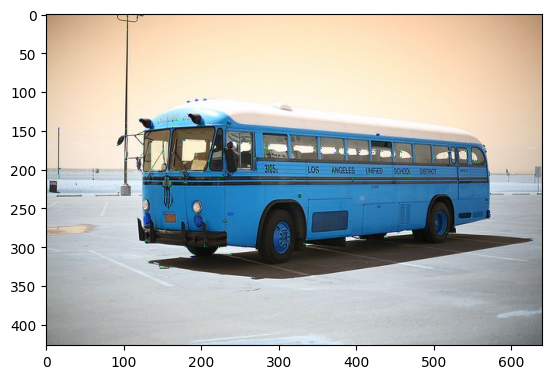

(<matplotlib.image.AxesImage at 0x7c953d761d20>, None)

In [14]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
filename = '/content/000000000471.jpg'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
# find Harris corners
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
dst = cv.dilate(dst,None)
ret, dst = cv.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)
# find centroids
ret, labels, stats, centroids = cv.connectedComponentsWithStats(dst)
# define the criteria to stop and refine the corners
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]
cv.imwrite('subpixel5.png',img)#subpixel5.png
plt.show()
cv2_imshow(img)
plt.imshow(img),plt.show()

<ipython-input-15-95e0e54ba152>:7: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


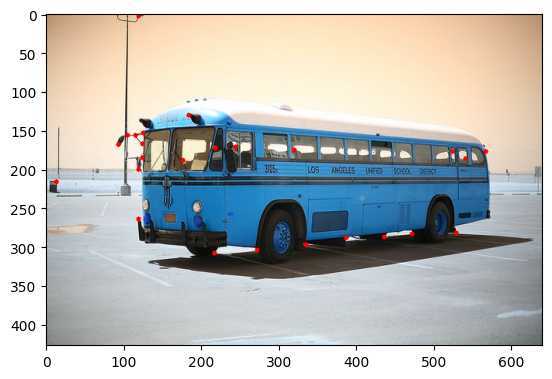

(<matplotlib.image.AxesImage at 0x7c953d711300>, None)

In [15]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('/content/000000000471.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
corners = cv.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)
for i in corners:
 x,y = i.ravel()
 cv.circle(img,(x,y),3,255,-1)
plt.imshow(img),plt.show()

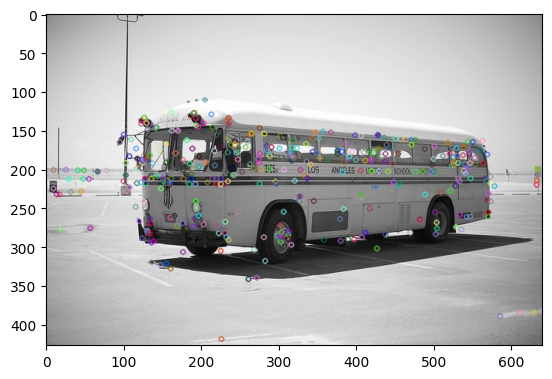

(<matplotlib.image.AxesImage at 0x7c953d6e4c40>, None)

In [16]:
import numpy as np
import cv2 as cv
img = cv.imread('/content/000000000471.jpg')
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
sift = cv.SIFT_create()
kp = sift.detect(gray,None)
img=cv.drawKeypoints(gray,kp,img)
cv.imwrite('sift_keypoints.jpg',img)
plt.imshow(img),plt.show()

Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 2515
Total Keypoints without nonmaxSuppression: 8668


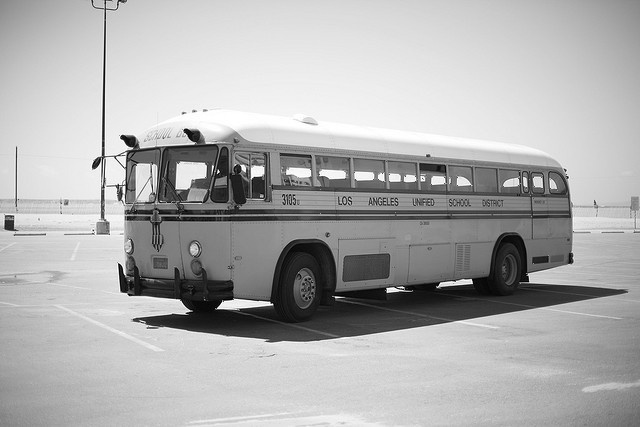

In [17]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
img = cv.imread('/content/000000000471.jpg', cv.IMREAD_GRAYSCALE) # `<opencv_root>/samples/data/blox.jpg`
# Initiate FAST object with default values
fast = cv.FastFeatureDetector_create()
# find and draw the keypoints
kp = fast.detect(img,None)
img2 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
# Print all default params
print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "neighborhood: {}".format(fast.getType()) )
print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)) )
cv.imwrite('fast_true.png', img2)
# Disable nonmaxSuppression
fast.setNonmaxSuppression(0)
kp = fast.detect(img, None)
print( "Total Keypoints without nonmaxSuppression: {}".format(len(kp)) )
img3 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
cv.imwrite('fast_false.png', img3)
cv.imwrite('sift_keypoints.jpg',img)

#plt.imshow(img),plt.show()
cv2_imshow(img)

Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 2515
Total Keypoints without nonmaxSuppression: 8668


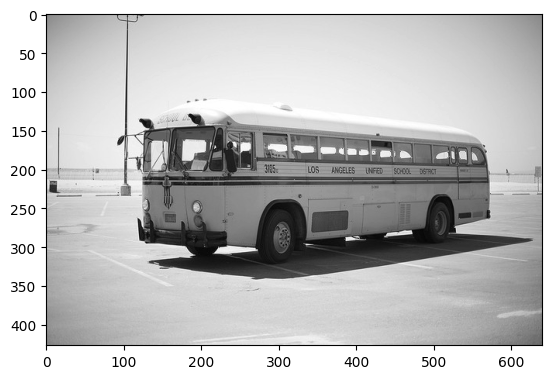

(<matplotlib.image.AxesImage at 0x7c953d103730>, None)

In [18]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('/content/000000000471.jpg', cv.IMREAD_GRAYSCALE) # `<opencv_root>/samples/data/blox.jpg`
# Initiate FAST object with default values
fast = cv.FastFeatureDetector_create()
# find and draw the keypoints
kp = fast.detect(img,None)
img2 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
# Print all default params
print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "neighborhood: {}".format(fast.getType()) )
print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)) )
cv.imwrite('fast_true.png', img2)
# Disable nonmaxSuppression
fast.setNonmaxSuppression(0)
kp = fast.detect(img, None)
print( "Total Keypoints without nonmaxSuppression: {}".format(len(kp)) )
img3 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
cv.imwrite('fast_false.png', img3)
plt.imshow(img),plt.show()

32
(266, 32)


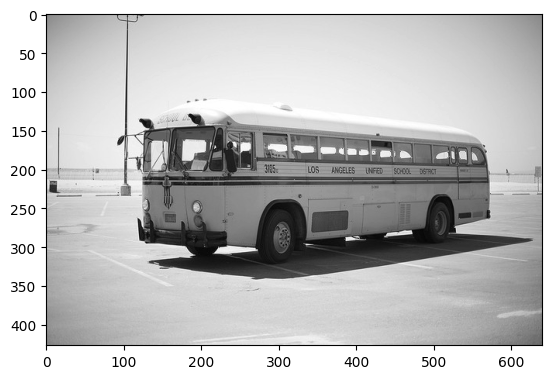

(<matplotlib.image.AxesImage at 0x7c953d25af50>, None)

In [19]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('/content/000000000471.jpg', cv.IMREAD_GRAYSCALE)
# Initiate FAST detector
star = cv.xfeatures2d.StarDetector_create()
# Initiate BRIEF extractor
brief = cv.xfeatures2d.BriefDescriptorExtractor_create()
# find the keypoints with STAR
kp = star.detect(img,None)
# compute the descriptors with BRIEF
kp, des = brief.compute(img, kp)
print( brief.descriptorSize() )
print( des.shape )
plt.imshow(img),plt.show()

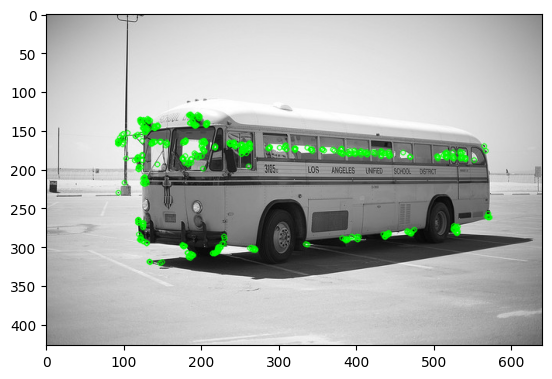

(<matplotlib.image.AxesImage at 0x7c953d6a8a30>, None)

In [20]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('/content/000000000471.jpg', cv.IMREAD_GRAYSCALE)
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img,None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()

In [21]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
MIN_MATCH_COUNT = 10
img1 = cv.imread('/content/000000000471.jpg', cv.IMREAD_GRAYSCALE) # queryImage
img2 = cv.imread('/content/0000000000472.PNG', cv.IMREAD_GRAYSCALE) # trainImage
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
 if m.distance < 0.7*n.distance:
 good.append()

IndentationError: expected an indented block after 'if' statement on line 20 (<ipython-input-21-5f5f43a059f0>, line 21)

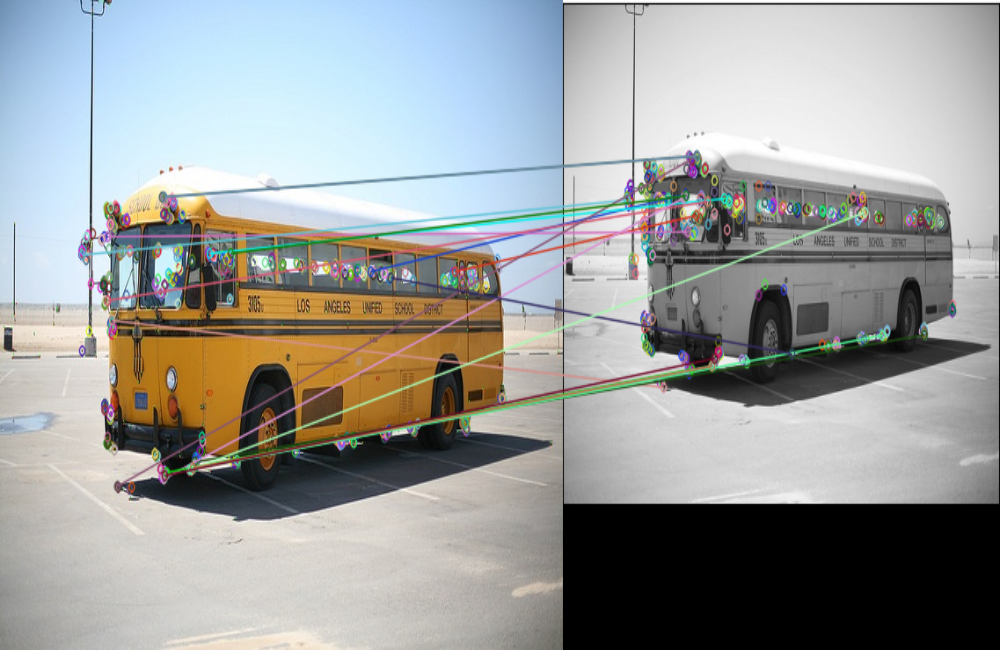

-1

In [22]:

import numpy as np
import cv2


# Read the query image as query_img
# and train image This query image
# is what you need to find in train image
# Save it in the same directory
# with the name image.jpg
query_img = cv2.imread('/content/000000000471.jpg')
train_img = cv2.imread('/content/0000000000472.PNG')

# Convert it to grayscale
query_img_bw = cv2.cvtColor(query_img,cv2.COLOR_BGR2GRAY)
train_img_bw = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY)

# Initialize the ORB detector algorithm
orb = cv2.ORB_create()

# Now detect the keypoints and compute
# the descriptors for the query image
# and train image
queryKeypoints, queryDescriptors = orb.detectAndCompute(query_img_bw,None)
trainKeypoints, trainDescriptors = orb.detectAndCompute(train_img_bw,None)

# Initialize the Matcher for matching
# the keypoints and then match the
# keypoints
matcher = cv2.BFMatcher()
matches = matcher.match(queryDescriptors,trainDescriptors)

# draw the matches to the final image
# containing both the images the drawMatches()
# function takes both images and keypoints
# and outputs the matched query image with
# its train image
final_img = cv2.drawMatches(query_img, queryKeypoints,
train_img, trainKeypoints, matches[:20],None)

final_img = cv2.resize(final_img, (1000,650))

# Show the final image
cv2_imshow(final_img)
cv2.waitKey(3000)